In [3]:
import numpy as np
import pandas as pd
import math

from matplotlib import rc

import scipy


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# design matrix as a column vector
X = np.hstack((np.ones((20,1)),np.array(numcourses, ndmin=2).T)) # 2차원
print(X.shape)

X_leftinv = np.linalg.inv(X.T@X) @ X.T

beta = X_leftinv @ happiness
beta

# predicted data
pred_happiness = X@beta

## [Problem 10-1]
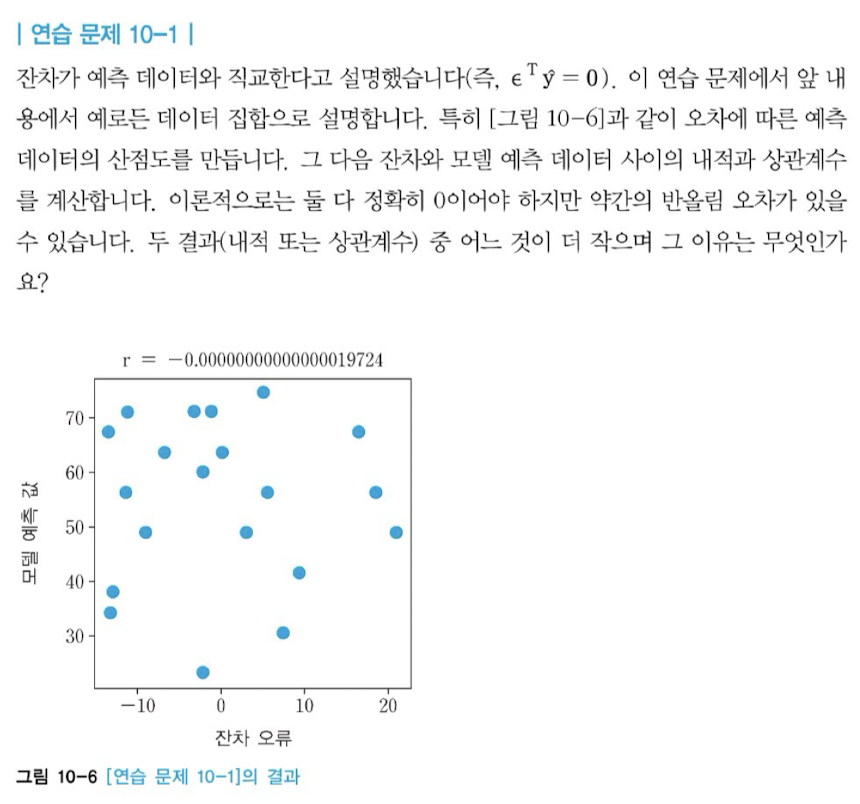

Note that, 잔차는 예측 데이터와 직교 (GLM에서의 성질은 아니고, SSE에서의 성질)
- (즉, $\epsilon' \hat y=0$)


Dataset: 개념 설명에서 사용한 데이터셋

**1. 오차에 따른 예측 데이터의 산점도를 만들기**
- x: $\epsilon$
- y: ${\hat y}$


**2. $\epsilon$과 ${\hat y}$ 사이의 내적, $\rho$ 계산**
- 이론적으로는 두 값 모두 0 (But, 오차 존재 가능)
- 두 결과의 대소비교 및 그 이유 서술

In [11]:
epsilon = happiness - pred_happiness
epsilon

array([ -1.20701699, -12.92316241, -13.50881092, -13.22495634,
         5.09477695,  -3.20701699,  16.49118908,   5.58580727,
        -6.81060486,  -9.0177806 , -11.20701699,   0.18939514,
       -11.41419273,   7.47324972,   9.37863153,   2.9822194 ,
        -2.11239879,  -2.13033815,  18.58580727,  20.9822194 ])

In [21]:
# 1. inner product (잔차와 예측값)
inner_prod = np.dot(epsilon, pred_happiness)

# 2. correlation coefficient (잔차와 예측값)
corr = np.corrcoef(epsilon, pred_happiness)[0, 1]


if abs(inner_prod) > abs(corr):
  daeso = 'inner product > correlation coefficient.'
else:
  daeso = 'correlation coefficient > inner product.'

print(f'inner product: \n{abs(inner_prod)}\n\ncorrealtion coefficient: \n{abs(corr)}\n\n{daeso}')

inner product: 
5.752553988713771e-11

correaltion coefficient: 
1.972431375442212e-16

inner product > correlation coefficient.


Text(0, 0.5, 'Predicted y')

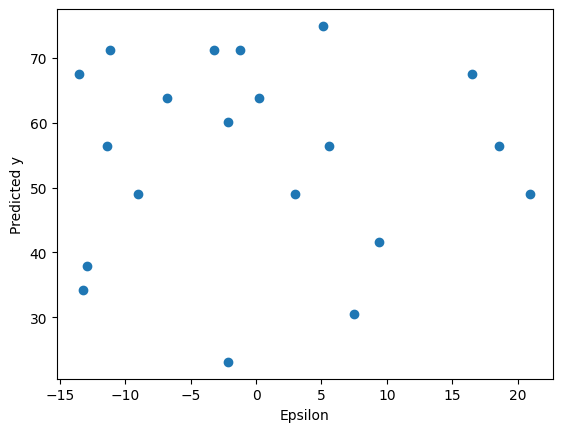

In [12]:
plt.scatter(epsilon, pred_happiness)
plt.xlabel('Residual error')
plt.ylabel('Predicted y')

- mean centering이 되어 있다는 가정 하에서는, 필연적으로 '상관계수 < 내적'
  - $\because$ 상관계수는 $\frac{x'y}{||x||||y||}$

## [Problem 10-2]
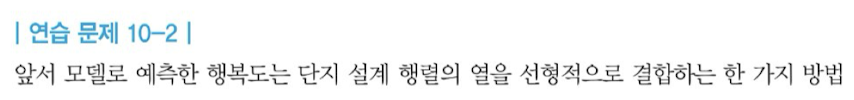
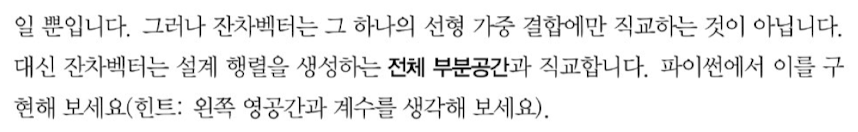

앞서 구한 $\hat y$은 Design matrix 열의 선형 결합 중 하나일 뿐

**$\epsilon$은 $\hat y$과 직교하는 것 뿐만 아니라,
Design matrix가 span하는 전체 subspace와 직교**하는 것.

-> 이를 구현 (Hint: 왼쪽 영공간, rank)


- **Left Null Space**: $\{x|x'A=0\}$

  - Notation: $N(A')$

! $ϵ'X=0$(즉, $ϵ \in N(X')$)을 만족하는 것을 보이면, $ϵ$이 Design matrix가 span하는 subspace에 직교하는 것이라고 볼 수 있겠구나

In [44]:
nullspace = scipy.linalg.null_space(X.T)
nullspace.shape

array([[ 1., 13.],
       [ 1.,  4.],
       [ 1., 12.],
       [ 1.,  3.],
       [ 1., 14.],
       [ 1., 13.],
       [ 1., 12.],
       [ 1.,  9.],
       [ 1., 11.],
       [ 1.,  7.],
       [ 1., 13.],
       [ 1., 11.],
       [ 1.,  9.],
       [ 1.,  2.],
       [ 1.,  5.],
       [ 1.,  7.],
       [ 1., 10.],
       [ 1.,  0.],
       [ 1.,  9.],
       [ 1.,  7.]])

In [43]:
# X의 Left-null space에 epsilon을 컬럼으로 추가해서 rank가 늘지 않는다면, epsilon은 X의 Left-null space에 포함되는 것

nullspaceAugment = np.hstack((nullspace, epsilon.reshape(-1, 1)))
nullspaceAugment.shape # column agmentation


# print their ranks
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

array([[-2.77729428e-01, -9.29957855e-02, -3.18781349e-01,
        -2.98255389e-01, -2.77729428e-01, -2.16151547e-01,
        -2.57203468e-01, -1.75099627e-01, -2.98255389e-01,
        -2.57203468e-01, -2.16151547e-01, -7.24698252e-02,
        -1.34047706e-01, -1.75099627e-01, -2.36677508e-01,
        -3.14179046e-02, -2.16151547e-01, -1.75099627e-01,
        -1.20701699e+00],
       [ 9.78246477e-02, -3.75549191e-01,  2.03018834e-01,
         1.50421741e-01,  9.78246477e-02, -5.99666319e-02,
         4.52275545e-02, -1.65160818e-01,  1.50421741e-01,
         4.52275545e-02, -5.99666319e-02, -4.28146284e-01,
        -2.70355005e-01, -1.65160818e-01, -7.36953867e-03,
        -5.33340471e-01, -5.99666319e-02, -1.65160818e-01,
        -1.29231624e+01],
       [ 9.32294288e-01,  2.39156454e-02, -8.80660136e-02,
        -7.78858628e-02, -6.77057120e-02, -3.71652595e-02,
        -5.75255612e-02, -1.68049579e-02, -7.78858628e-02,
        -5.75255612e-02, -3.71652595e-02,  3.40957963e-02,
    

- $r(N(X')) = r(N(X') |ϵ ) $ 이므로, $ϵ \in N(X')$

- 즉, $ϵ'X=0$

- 따라서, $ϵ$이 Design matrix가 span하는 모든 subspace에 직교하는 것

## [Problem 10-4]
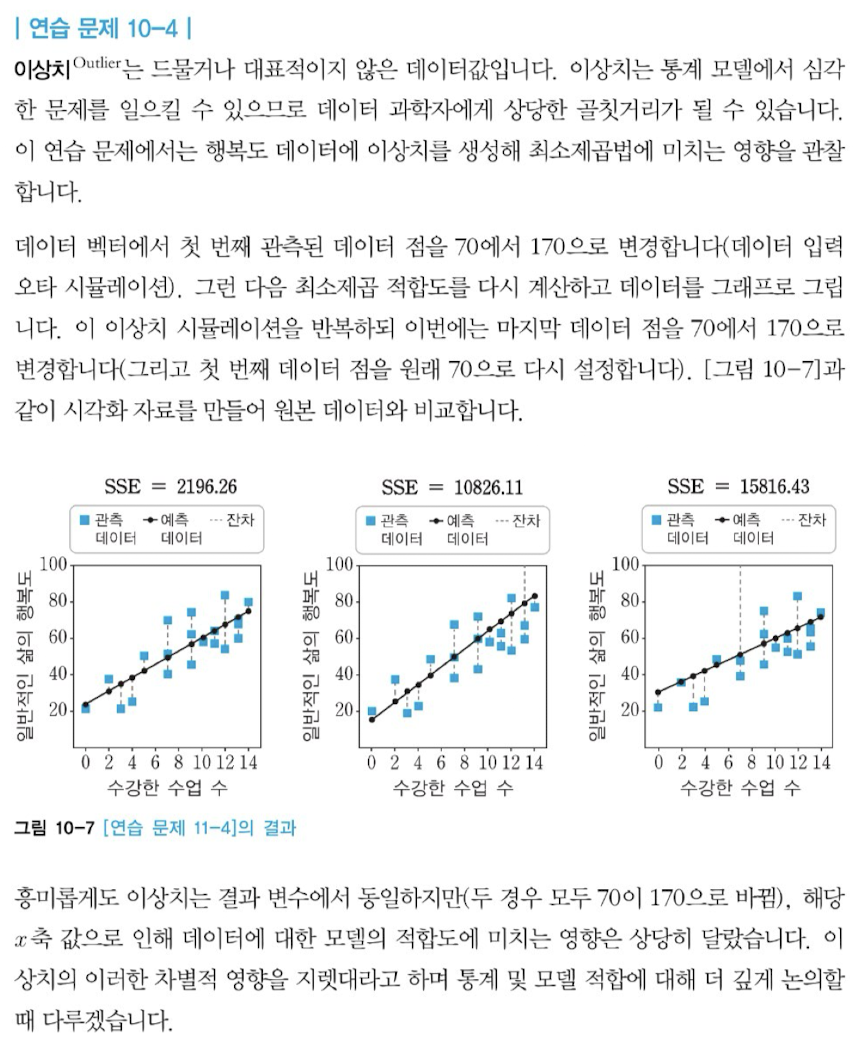

### Case 1: 첫 번째 관측치를 이상치 처리

In [50]:
happiness_c1  = [170, # outlier
                 25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

In [57]:
beta_c1 = np.linalg.inv(X.T @ X) @ X.T @ happiness_c1

y_hat_c1 = X @ beta_c1
y_hat_c1

SSE_c1 = np.sum((happiness_c1 - y_hat_c1)**2)
SSE_c1

10826.110493729162

### Case 2: 마지막 관측치를 이상치 처리

In [90]:
happiness_c2  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,
                 170] # oulier

[70,
 25,
 54,
 21,
 80,
 68,
 84,
 62,
 57,
 40,
 60,
 64,
 45,
 38,
 51,
 52,
 58,
 21,
 75,
 170]

In [91]:
beta_c2 = np.linalg.inv(X.T @ X) @ X.T @ happiness_c2

y_hat_c2 = X @ beta_c2
y_hat_c2

SSE_c2 = np.sum((happiness_c2 - y_hat_c2)**2)
SSE_c2

array([ -4.01698682, -20.16240673, -16.81092237, -20.95634228,
         2.77694872,  -6.01698682,  13.18907763,   0.807271  ,
       -10.60485791, -14.7806001 , -14.01698682,  -3.60485791,
       -16.192729  ,  -0.75027782,   2.63152881,  -2.7806001 ,
        -6.39879346, -11.33814891,  13.807271  , 115.2193999 ])

### 시각화

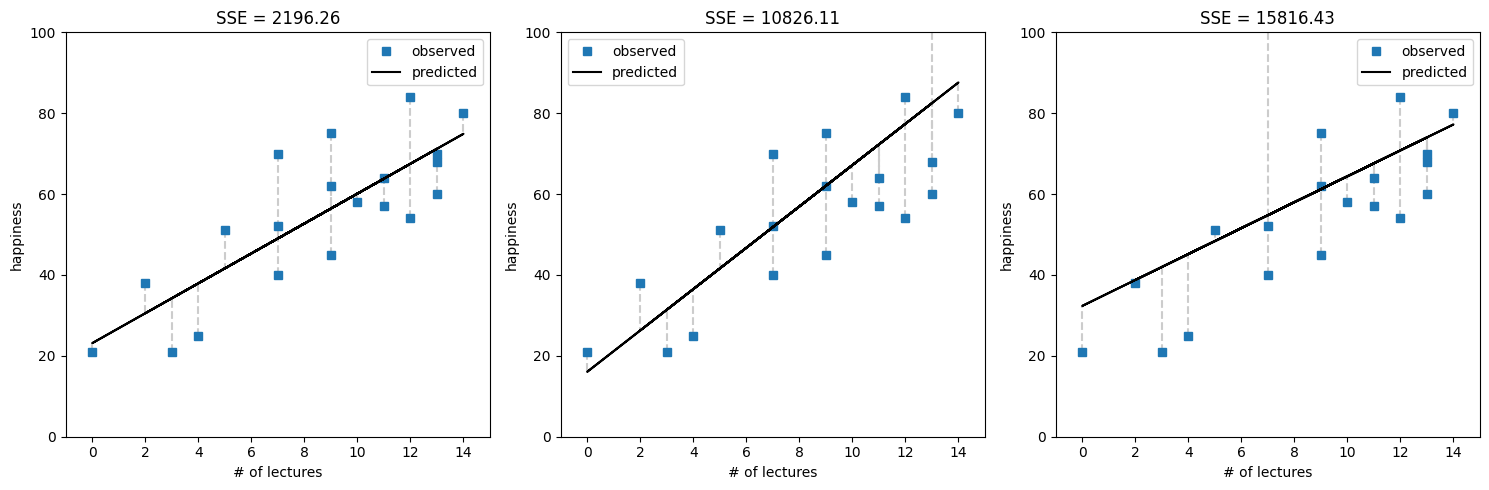

In [94]:
plt.figure(figsize=(15,5))

# 1st plot
plt.subplot(1, 3, 1)
plt.plot(X[:,1], happiness, 's', label='observed')
plt.plot(X[:,1], pred_happiness, 'k-', label='predicted')
plt.xlim(-1, 15) # min을 0으로 주는 것 보다 -1로 주는 게 예쁘다
plt.ylim(0, 100)
plt.xlabel('# of lectures')
plt.ylabel('happiness')
plt.legend()

# plot the residuals (errors) 어려웡
for n,y_,yHat in zip(X[:,1], happiness, pred_happiness):
  plt.plot([n,n],[y_,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.title(f'SSE = {round(np.sum((happiness - pred_happiness)**2),2)}')


# 2nd plot
plt.subplot(1, 3, 2)
plt.plot(X[:,1], happiness_c1, 's', label='observed')
plt.plot(X[:,1], y_hat_c1, 'k-', label='predicted')
plt.xlim(-1, 15)
plt.ylim(0, 100)
plt.xlabel('# of lectures')
plt.ylabel('happiness')
plt.legend()

for n,y_,yHat in zip(X[:,1], happiness_c1, y_hat_c1):
  plt.plot([n,n],[y_,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.title(f'SSE = {round(SSE_c1, 2)}')


# 3rd plot
plt.subplot(1, 3, 3)
plt.plot(X[:,1], happiness_c2, 's', label='observed')
plt.plot(X[:,1], y_hat_c2, 'k-', label='predicted')
plt.xlim(-1, 15)
plt.ylim(0, 100)
plt.xlabel('# of lectures')
plt.ylabel('happiness')
plt.legend()

for n,y_,yHat in zip(X[:,1], happiness_c2, y_hat_c2):
  plt.plot([n,n],[y_,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.title(f'SSE = {round(SSE_c2, 2)}')

plt.tight_layout()
plt.show()

## [Problem 10-5]
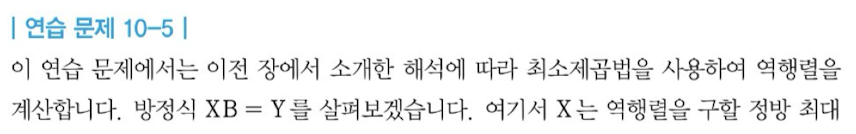
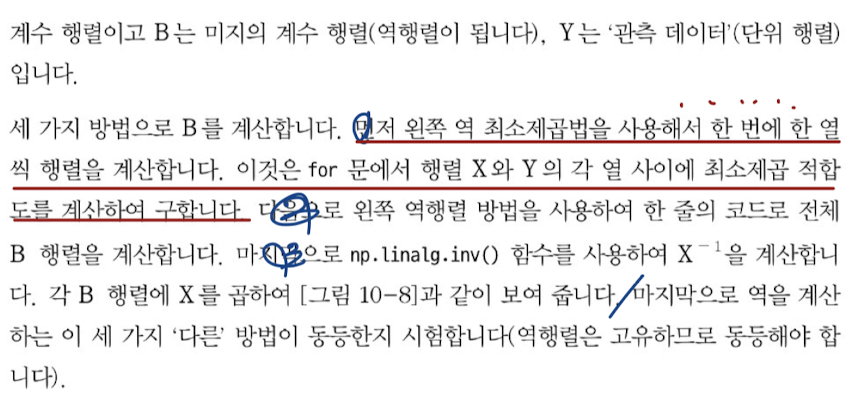

**최소제곱법을 사용하여, 역행렬 계산하기**

$XB=Y$
- $X$: Invertible Full rank (Square)
- $B$: Coefficient matrix
- $Y$: Observed data (Identity matrix)

$B$ 계산
- 계산 1. Left inverse LSE (한 번에 한 열씩 행렬 계산)
  - for문을 통해, 행렬 X, Y의 각 열 사이에 SSE를 계산하여
- 계산 2. Left inverse LSE (그런데 이제 한 줄의 코드로 계산)
- 계산 3. `np.linalg.inv()` 함수를 사용하여 $X^{-1}$를 계산

마지막으로, 이 세 가지 계산이 모두 동등한지 시험 (결과는 동등해야 함)



---



In [ ]:
# Create Matrix
n = 5
X = np.random.rand(n, n)
np.linalg.matrix_rank(X) # Full rank

5

In [ ]:
Y = np.eye(n)
Y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 계산 1

- X, Y의 열 하나씩

In [ ]:
# find the best-fitting model one column at a time
B_1 = np.zeros_like(X)

for coli in range(n):
  B_1[:,coli] = np.linalg.inv(X.T@X) @ X.T @ Y[:,coli]

B_1
# 나 이거 납득 안 돼

array([[-6.95599359,  7.12612479,  1.3714975 ,  5.27239244, -5.20355276],
       [ 3.57361825, -3.13254385, -0.31997778, -1.08544106,  1.29277135],
       [ 5.67053965, -9.88658343, -0.14186617, -4.29230756,  6.66120473],
       [-3.41884606,  7.86440116,  1.09599683,  2.58104096, -5.61738367],
       [ 3.50533363, -3.90745944, -1.50240445, -3.58959831,  4.63092622]])

### 계산 2

- Left inverse

In [ ]:
B_2 = (np.linalg.inv(X.T @ X) @ X.T) @ Y
B_2

array([[-6.95599359,  7.12612479,  1.3714975 ,  5.27239244, -5.20355276],
       [ 3.57361825, -3.13254385, -0.31997778, -1.08544106,  1.29277135],
       [ 5.67053965, -9.88658343, -0.14186617, -4.29230756,  6.66120473],
       [-3.41884606,  7.86440116,  1.09599683,  2.58104096, -5.61738367],
       [ 3.50533363, -3.90745944, -1.50240445, -3.58959831,  4.63092622]])

### 계산 3

- `np.linalg.inv()`

In [ ]:
B_3 = np.linalg.inv(X)
B_3

array([[-6.95599359,  7.12612479,  1.3714975 ,  5.27239244, -5.20355276],
       [ 3.57361825, -3.13254385, -0.31997778, -1.08544106,  1.29277135],
       [ 5.67053965, -9.88658343, -0.14186617, -4.29230756,  6.66120473],
       [-3.41884606,  7.86440116,  1.09599683,  2.58104096, -5.61738367],
       [ 3.50533363, -3.90745944, -1.50240445, -3.58959831,  4.63092622]])

### 동등성 검증


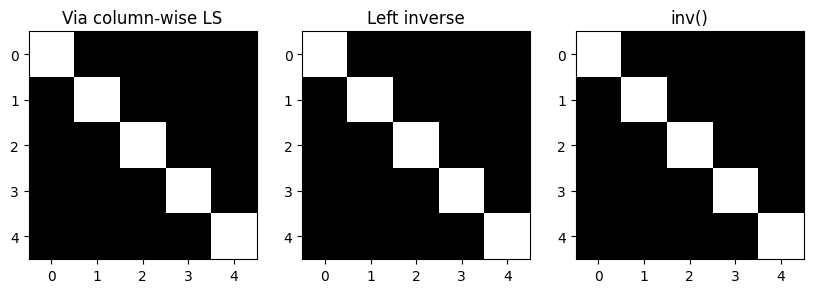

In [ ]:
# 계산 1
_,axs = plt.subplots(1,3,figsize=(10,6))

axs[0].imshow( B_1@X ,cmap='gray')
axs[0].set_title('Via column-wise LS')

# 계산 2

axs[1].imshow( B_2@X ,cmap='gray')
axs[1].set_title('Left inverse')

# 계산 3

axs[2].imshow( B_3@X ,cmap='gray')
axs[2].set_title('inv()')

plt.show()